# Gradient Descent Method(경사 하강법)
> - 참고: 책 <<밑바닥부터 시작하는 딥러닝>>, pp.132-133 

f(x0, x1) = xo ^ 2 + x1 ^ 2의 최솟값 구해보기

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# 타겟 함수
def f(x):
    return x[0] ** 2 + x[1] ** 2


# 기울기: 모든 변수의 편미분을 벡터로 정리한 것
def numerical_gradient(f, x:np.array, h=1e-4):
    
    # x와 형상이 같은 배열 생성
    grad = np.zeros_like(x)

    for idx in range(x.size):
        temp_val = x[idx]

        x[idx] = temp_val + h
        fxh1 = f(x)

        x[idx] = temp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        
        x[idx] = temp_val
    
    return grad


# 경사 하강법
def gradient(f, init_x, lr=0.1, step_num=100):
    x = init_x

    for _ in range(step_num):
        x -= (lr * numerical_gradient(f, x))
        
    return x

In [17]:
init_x = np.array([-3.0, 4.0])
gradient(f, init_x)

array([-6.11110793e-10,  8.14814391e-10])

최솟값 탐색 그래프로 확인해보기

In [93]:
# 경사 하강법(수정)
def gradient(f, init_x, lr=0.1, step_num=100):
    x = init_x

    # 각 스텝별 x를 저장하는 array
    history = np.empty((0, x.shape[0]))

    for _ in range(step_num):
        x -= (lr * numerical_gradient(f, x))
        x_copy = np.expand_dims(x.copy(), axis=0)
        history = np.append(history, x_copy, axis=0)
    
    return history

In [111]:
init_x = np.array([-3.0, 4.0])
history = gradient(f, init_x, lr=0.1)

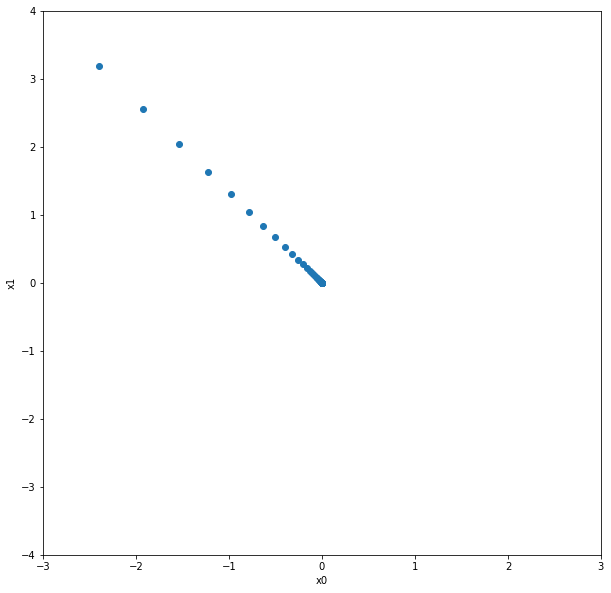

In [112]:
plt.figure(figsize=(10, 10))
plt.xlabel('x0')
plt.ylabel('x1')
plt.xlim(-3, 3)
plt.ylim(-4, 4)
plt.scatter(history[:, 0], history[:, 1])